# Project: Titanic - ML for Disater

In [25]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train_df = pd.read_csv("F:/DA/Titanic/train.csv")
test_df = pd.read_csv("F:/DA/Titanic/test.csv")

In [27]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Note**
SibSp: Sibling, số anh/chị/em cùng đi trên chuyến tàu
Parch: Số cha/mẹ/con cùng đi trên chuyến tàu
Ticket: Vé số
Cabin: Cabin số
Embarked: Tên cảng

In [29]:
# preview datab
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Cột passengerId là thứ tự của hành khách, không có giá trị hữu ích nên convert thành mã của hàng như bên cạnh

In [30]:
train_df.set_index(train_df.PassengerId, inplace=True)

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train_df.drop('PassengerId',axis=1,inplace=True)
# axis = 1 --> Xóa toàn bộ dữ liệu của cột
# inplace = True --> Xóa dữ liệu trên bảng này 

In [33]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
test_df = pd.read_csv("F:/DA/Titanic/test.csv", index_col = "PassengerId")
# Trong hàm read có 1 argument là index_col --> Để chọn 1 hàng bất kỳ làm mã tham chiếu

In [35]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 1. Feature Classification (Phân loại các dạng đặc trưng) : Categorical vs Numerical

## 1.1. Categorical: 
- Kiểu dữ liệu có tính chất phân loại (Nam/Nữ, Già/Trẻ,...)
- 4 loại: nominal, ordinal (Theo thứ tự: 1st,2nd,3rd,....), ratio, interval
## 1.2. Numerial: 
- Kiểu dữ liệu về số
- 3 loại: Rời rạc (Dữ liệu không phân bổ theo giá trị nào cả), liên tục, time series (thời gian)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Phải xử lý các dòng null --> Khi thực hiện ML không được để dữ liệu null**
bảng train_df có cột Age, Cabin, Embarked

In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Bảng test_df có cột Age, Cabin,Fare

Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch
Numerical: Age (continuous), Fare (discrete)
Mix type of data: Ticket, Cabin
Blank or null: Cabin > Age > Embarked
Contain error/typo: Name
Various data type: String, int, float

Survived: 1 --> sống, 0 --> chết
Survived có kiểu dữ liệu là int, nhưng thuộc loại categorical nên phải convert lại

In [38]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [39]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [40]:
# Viết 1 hàm để chuyển đổi dữ liệu trong nhiều cột thành 1 loại dữ liệu
features = ['Pclass','Sex','Embarked','SibSp','Parch']
def convert_cat(df, features):
    for feature in features :
        df[feature] = df[feature].astype('category')
convert_cat(train_df, features)
convert_cat(test_df, features)

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## 1. Distribution of Data

**Distribution of Numerical feature values across the samples (Phân bổ của các dữ liệu dạng số)**

In [42]:
train_df.describe()
# hàm describe --> hiển thị thống kê về số học của DL số

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Age
- Có 714 records
- Tuổi trung bình là 29.69 --> xấp xỉ 30 tuổi
- Tuổi nhỏ nhất là 0.42 --> có 1 trẻ em khoảng 4 tháng tuổi
- Tuổi cáo nhất là 80
Fare
- Có 891 bản ghi
- Giá trung bình: 32.2$
- Giá thấp nhất: 0$ --> free: Có tồn tại vé được tặng
- Giá cao nhất: 512$

**Distribution of Categorical**

In [43]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


Unique: Giá trị duy nhất
Top: Giá trị xuất hiện nhiều nhất
Freq: Giá trị top xuất hiện bnh lần

Survived
- 891 bản ghi
- 2 giá trị duy nhất: 1 vs 0
- Số người chết nhiều hơn
- 549 người chết
Pclass
- 891 bản ghi
- 3 giá trị duy nhất: 1st,2nd,3rd
- Loại vé 3rd nhiều nhất
- 491 vé 3rd
Sex
- 891 bản ghi
- 2 giá trị duy nhất: Male, Female
- Số người là Male nhiều hơn
- 577 Male
SibSp
- 891 bản ghi
- 7 giá trị duy nhất
- 608 giá trị 0
Parch
- 891 bản ghi
- 7 giá trị duy nhất
- 678 giá trị 0
Embarked
- 889 bản ghi
- 3 giá trị duy nhất
- Cảng S (southamton) được xuất phát nhiều nhất
- 644 cảng S

## 2. Exploratary Data Analysis (EDA): Khai phá dữ liệu

### 2.1. Correlating categorical features : Tương quan hóa dữ liệu phân loại
Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch
Target: Survived

In [44]:
train_df['Survived'].value_counts().to_frame()
# Xem có bnh người sống, chết

,Survived
0,549
1,342


In [45]:
train_df['Survived'].value_counts(normalize=True).to_frame()
#Tính %

,Survived
0,0.616162
1,0.383838


.--> Có 38.38% người sống. Vì dữ liệu training chịu sự mất cân bằng nên sẽ không được chính xác, vì vậy sẽ sử dụng 1 kỹ thuật gọi là Sampling để giải quyết sự mất cân bằng

**Sex**

In [46]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


<AxesSubplot:xlabel='Sex', ylabel='count'>

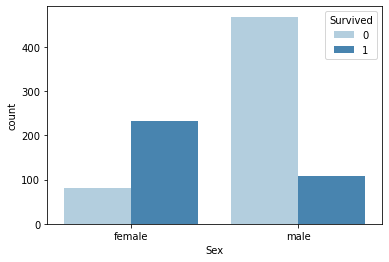

In [47]:
# Biểu diễn tỷ lệ sống sót theo giới tính
sns.countplot(data=train_df,x='Sex',hue = 'Survived',palette = 'Blues')

--> Số lượng nữ giới sống sót cao hơn nam giới

- Remaining Categorical features columns

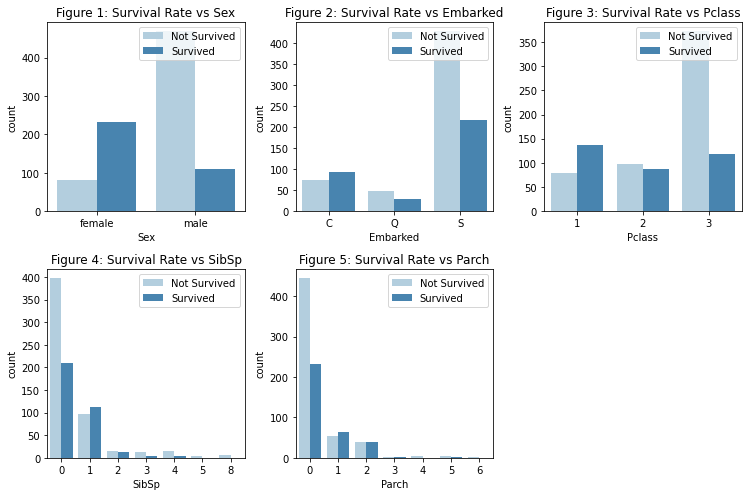

In [48]:
# TRực quan hóa từng dữ liệu với target Survived

cols = ['Sex','Embarked','Pclass','SibSp','Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows,n_cols, figsize=(n_cols*3.5,n_rows*3.5))

for r in range(0, n_rows):  #Trỏ vào từng hàng
    for c in range(0, n_cols): #Trỏ vào từng cột
        i = r*n_cols + c #Trỏ vào các cột trong biến cols, r=0,c=0 --> 'Sex', r=0,c=1 --> 'Embarked'
        if i < len(cols): #Điều kiện để giới hạn các biến chỉ trỏ tới dữ liệu cuối cùng trong cols
            ax_i = ax[r,c] # ax_i là mỗi khung hình
            sns.countplot(data=train_df, x = cols[i], hue = 'Survived', palette = 'Blues', ax = ax_i) #Vẽ biểu đồ
            ax_i.set_title(f'Figure {i+1}: Survival Rate vs {cols[i]}') # Đặt tên 
            ax_i.legend(title ='', loc = 'upper right', labels = ['Not Survived', 'Survived']) # Đặt chú thích
ax.flat[-1].set_visible(False) # Xóa biểu đồ cuối cùng
plt.tight_layout() # Để làm cho các khung hình không chồng chéo nhau
plt.show()

Fig 1: Tỷ lệ nữ giới sống sót > nam giới
Fig 2: Hầu hết mọi người xuất phát từ cảng Southampton, nhưng tại cảng này số lượng người chết đông nhất. Tại cảng C có số lượng        người sống cao hơn người chết
Fig 3: Hạng 1st có số người sống sót cao nhất, hạng 3 có số người chết cao nhất
Fig 4: Người đi 1 mình có tỷ lệ chết cao nhất. Người đi cùng 1-2 ace có tỷ lệ sống sót tốt hơn
Fig 5: Người đi 1 mình có tỷ lệ chết cao nhất

### 2.2. Correlating numerical features

Numerical: Age, Fare

**Age**

<AxesSubplot:xlabel='Age', ylabel='Count'>

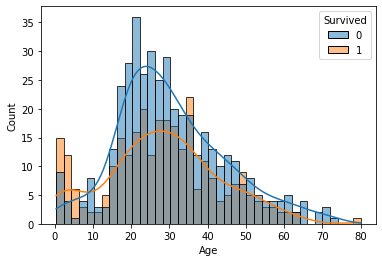

In [49]:
sns.histplot(data=train_df, x = "Age",hue = "Survived", bins = 40, kde=True)
# bins: Chia độ tuổi thành bao nhiêu khoảng
# kde : Đường tương quan

- 18 - 40 là độ tuổi đông nhất của hành khách
- Trẻ em từ 0-6 tuổi có cơ hội sống sót cao hơn

**Fare**

In [50]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

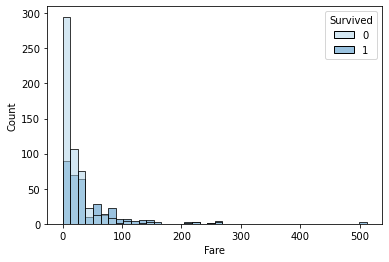

In [51]:
sns.histplot(data=train_df, x = "Fare",hue = 'Survived', bins = 40, palette = 'Blues')

<AxesSubplot:xlabel='Fare', ylabel='count'>

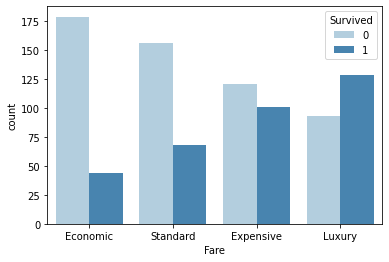

In [52]:
# Chia dữ liệu thành 4 khoảng: 0-25%, 25-50, 50-75,75-100

fare_categories = ['Economic','Standard','Expensive','Luxury']
quartile_data = pd.qcut(train_df['Fare'],4, labels = fare_categories)

sns.countplot(x = quartile_data, hue = train_df['Survived'], palette = 'Blues')

- Phân phối giá vé
+ Giá vé phân phối bất thường, có 1 lượng lớn giá vé từ 0-100$
+ Phân phối lệch trái với 75% số lượng vé dưới 31$ và giá vé cao nhất là 512$
- Quartile Plot: Biểu đồ khoảng
+ Hành khách với giá vé Luxury và Expensive có cơ hội sống sót cao hơn

## 3. Feature engineering & Data wrangling

## 3.1. Feature Engineering

## Name
- Regular expression : Sử dụng trang regex101.com để tách kí tự trong tên

In [53]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [54]:
import re #regular expression
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.") #r: raw string can match
    # Neu ket qua tra ve co 1 ban ghi khong match duoc voi regex kia thi day la cach log bug
    if p.search(name) is None:
        print(name)
    return p.search(name).groups(1)[0].strip()  #strip: bo ki tu dau tien cuar chuoi ket qua

train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name))


In [55]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [56]:
test_df['Title']=test_df['Name'].apply(lambda name: extract_title(name))

In [57]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

Thấy được từ 2 bảng train và test chỉ có 4 dữ liệu đầu tiên là chiếm số lớn trong tổng số, nên gộp các dữ liệu khác thành 1 loại gọi là other

In [58]:
def group_title (title):
    if title in ['Mr', 'Mrs','Miss','Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'

train_df['Title']=train_df['Title'].apply(lambda title: group_title(title))
test_df['Title']=test_df['Title'].apply(lambda title: group_title(title))

In [59]:
train_df['Title'].value_counts()


Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

In [60]:
test_df['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

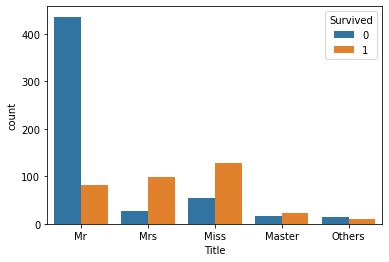

In [61]:
sns.countplot(data=train_df,x='Title',hue='Survived')

# Family
- 'Sibsp',  'Parch'

In [62]:
train_df['Family_size']=train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') +1

In [63]:
test_df['Family_size']=test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') +1

In [64]:
# Phân loại dữ liệu family thành 4 loại
train_df['Family_cat'] = pd.cut(train_df['Family_size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large']) # bins = (0,1] , (1,4] ,(4,6],(6,20]
test_df['Family_cat'] = pd.cut(test_df['Family_size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large']) # bins = (0,1] , (1,4] ,(4,6],(6,20]

<AxesSubplot:xlabel='Family_cat', ylabel='count'>

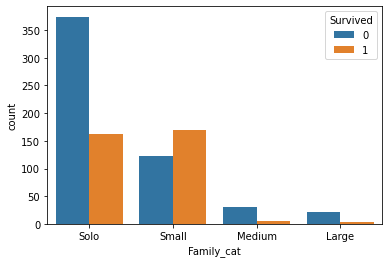

In [65]:
sns.countplot(data=train_df,x='Family_cat',hue = 'Survived')

## 3.2. Data Wrangling 
- Việc chuyển dữ liệu thô thành dữ liệu sẵn sàng để phân tích
- Bao gồm các việc data cleaning, fill và chuẩn hóa dữ liệu bị thiếu, lỗi chính tả

In [66]:
num_features = ['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']


In [67]:
def display_missing(df,feature_cols):
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count >0:
            print(f'col {col} has {missing_count} missing values')

display_missing(train_df,feature_cols)

col Age has 177 missing values
col Embarked has 2 missing values


### Fill missing values
#### Age 
- Fill missing values with 'median' of whole dataset

In [68]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']

In [69]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [70]:
# Điền những giá trị trống với dữ liệu trung bình

train_df['Age']=train_df.groupby(['Age','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [71]:
test_df['Age']=test_df.groupby(['Age','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [72]:
display_missing(train_df,feature_cols)

col Age has 177 missing values
col Embarked has 2 missing values


In [73]:
train_df['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [74]:
display_missing(train_df,feature_cols)

col Age has 177 missing values
col Embarked has 2 missing values


In [75]:
x = train_df[feature_cols]
y =train_df['Survived']

In [76]:
x_test = test_df[feature_cols]

In [77]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='median')), # Những dữ liệu dạng số mà bị missing thì được fill bằng giá trị trung bình của cột
    ('scaler', OneHotEncoder(handle_unknown='ignore'))
])

cat_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')), # Những dữ liệu dạng category mà bị missing thì được fill bằng giá trị xuất hiện nhiều nhất của cột
    ('scaler', OneHotEncoder(handle_unknown='ignore'))
])

In [78]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [79]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [80]:
x = preprocessor.transform(x) # x --> x_train, x_validation

In [81]:
x_test = preprocessor.transform(x_test)

# 4. Model Training

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# Sử dụng 80% DL để train, và 20% dữ liệu để tiến hành kiểm tra sự chính xác

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [84]:
x_train.shape , x_val.shape

((712, 353), (179, 353))

In [85]:
x_test.shape

(418, 353)

In [86]:
# binary classification
# Mô hình logistic regression để kiểm tra tính chính xác của tập dữ liệu train so với tập xác thực
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

### Logistic Regression

In [87]:
log_reg = LogisticRegression(solver='liblinear', max_iter = 1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [88]:
log_reg.score(x_val,y_val)

0.8324022346368715

In [89]:
y_pred = log_reg.predict(x_val)

In [90]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8194444444444444, 0.7763157894736842)

In [91]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.82      0.78      0.80        76

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



- y = ax1 + bx2 + bias (hằng số) --> y = ax1^2 + bx2^2 + cx1*x2 + bias

In [92]:
poly = PolynomialFeatures(degree = 2) # degree = x <-> đồ thị bậc x
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.transform(x_val)

In [93]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter = 1000)
poly_log_reg.fit(poly_features_x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [94]:
poly_log_reg.score(poly_features_x_val,y_val)

0.8268156424581006

### Decision Tree

In [95]:
decision_tree = DecisionTreeClassifier(criterion ='entropy',max_depth = 8,random_state=2022)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [96]:
decision_tree.score(x_val,y_val)

0.7597765363128491

## 4.1. Cross-Validation

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion ='entropy',max_depth = 8,random_state=2022)

lr_score = cross_val_score (log_reg_cv, x, y, scoring = 'accuracy', cv=5)

In [99]:
lr_score.mean(), lr_score.std()

(0.832772581758835, 0.020832841199819045)

In [100]:
lr_score = cross_val_score (dt_cv, x, y, scoring = 'accuracy', cv=5)

In [101]:
lr_score.mean(), lr_score.std()

(0.8237712635741635, 0.013825992692042632)

## 4.2. Baseline model

- Sử dụng baseline model để tìm ra model nào cho độ chính xác cao nhất --> từ đó sử dụng model này để training ai

In [105]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
# from xgboost import XGBClassifier 

models = [
    LinearSVC(random_state=2024),
    SVC(random_state=2024),
    KNeighborsClassifier(metric='minkowski',p=2),
    LogisticRegression(solver='liblinear',max_iter=1000),
    DecisionTreeClassifier(random_state=None),
    RandomForestClassifier(random_state=None),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
#     XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=seed)
]

In [116]:
from sklearn.model_selection import StratifiedKFold

def generate_baseline_results(models,x,y,metrics,cv=5,plot_results=False):
    # define K-fold
    kfold = StratifiedKFold(cv, shuffle=True,random_state=None )
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, x, y, scoring='accuracy', cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
        
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_id', 'accuracy_score'])
 

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color = 'lightblue', showmeans=True)
        plt.title('Boxplot of Baseline Model Accuracy using 5-fold cross-validation')
        plt.xticks(rotation=45)
        plt.show()
    
    # Tóm tắt kết quả
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat(([mean,std]),axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean','Standard Deviation']
    
    # sort by accuracy
    baseline_results.sort_values(by=['Mean'],ascending=False,inplace=True)
    return baseline_results
                
generate_baseline_results(models,x,y,metrics='accuracy',cv=5,plot_results=False)

,Mean,Standard Deviation
model_name,,
SVC,0.829402,0.016223
LinearSVC,0.827155,0.010912
ExtraTreesClassifier,0.826056,0.025264
LogisticRegression,0.824889,0.030265
AdaBoostClassifier,0.818166,0.028924
RandomForestClassifier,0.815937,0.014529
DecisionTreeClassifier,0.806917,0.021617
KNeighborsClassifier,0.803590,0.024169
